# Libraries

In [50]:
#Import the required liabraries
import pandas as pd
import numpy as np

from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt


# Dataset

In [51]:
#import the data from our given dataset
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Feature Engineering

In [52]:
#Check if any null values present in our dataset.
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [53]:
#Get an overall details of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [54]:
#From above we can see that 'Month' column datatype is 'object'. To proceed for timeseries analysis, we need to make it as datetime format
df['Month']=pd.to_datetime(df['Month'])

In [55]:
#Also passengers column is in int format. But for calculation / prediction we mostly get float dtype. So updatiung the dtype.
df['#Passengers']=df['#Passengers'].astype('float64')

In [56]:
#After converting dtype let's get the overall details of dataset now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [57]:
#Again to work in TSA, we can make month column to the index of dataset
df.set_index('Month',inplace=True)

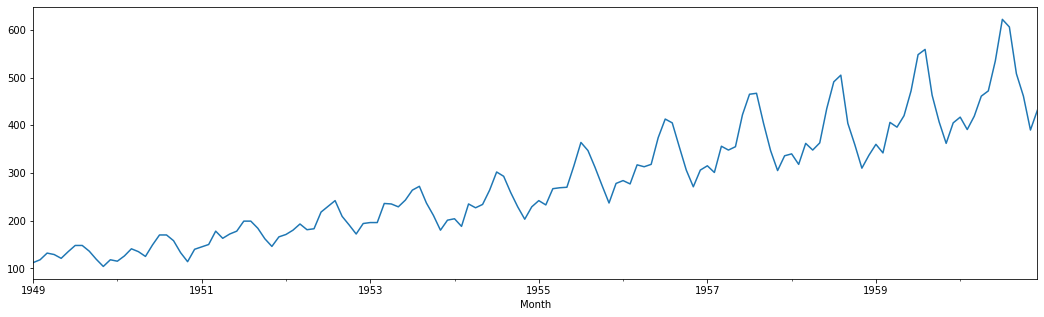

In [58]:
#Lets see our data in grphaical reprentation
df['#Passengers'].plot(figsize=(18,5))

From above we can clearly see that our data is having seasonality of 12 months.

# Time-Series Analysis

In [59]:
#Before going for TSA, we should check the stationarity  of data.
#Here we are using Augmented Dicky-Fuller (ADF)  test and Null Hypothesis concept for stationarity of data
#Creating a function to use this test frquently
def fullertest(series):
    result=adfuller(series)
    pvalue = result[1]
    if pvalue > .05:
        print('We have great evidence where we can not reject null hypothesis and tell data is not stationary')
    else:
        print('We have great evidence where we can reject null hypothesis and tell data is stationary')
    

In [60]:
#Now let's use above function to our dataset
fullertest(df['#Passengers'])

We have great evidence where we can not reject null hypothesis and tell data is not stationary


Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: 1 Shifted Passengers, dtype: float64
We have great evidence where we can not reject null hypothesis and tell data is not stationary


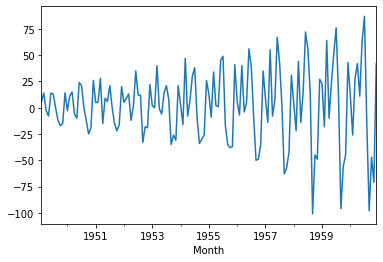

In [61]:
#From above we can see that our dataset is not stationary data. Lets use 'Diffrentiate' concept to make it stationary
#Shifting 1 row and the find the difference
df['1 Shifted Passengers'] = df['#Passengers'] - df['#Passengers'].shift(1)
print(df['1 Shifted Passengers'].head())
df = df.dropna()
df['1 Shifted Passengers'].plot()
fullertest(df['1 Shifted Passengers'])

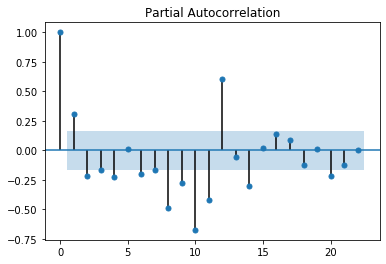

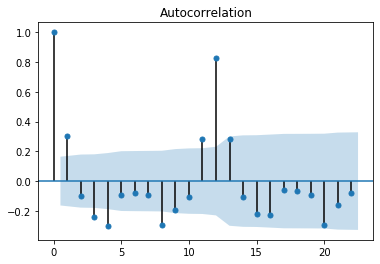

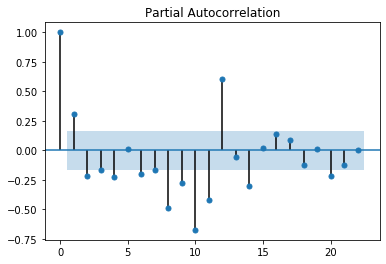

In [62]:
#Plotting the ACF and PACF for above data
plot_acf(df['1 Shifted Passengers'])
plot_pacf(df['1 Shifted Passengers'])

Month
1949-02-01     NaN
1949-03-01     NaN
1949-04-01    11.0
1949-05-01   -11.0
1949-06-01     6.0
Name: 2 Shifted Passengers, dtype: float64
We have great evidence where we can reject null hypothesis and tell data is stationary


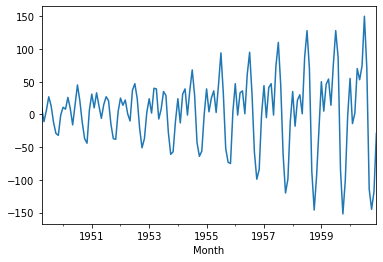

In [63]:
#Shifting 2 row and the find the difference
df['2 Shifted Passengers'] = df['#Passengers'] - df['#Passengers'].shift(2)
print(df['2 Shifted Passengers'].head())
df = df.dropna()
df['2 Shifted Passengers'].plot()
fullertest(df['2 Shifted Passengers'])

C:\Users\SarojRakesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


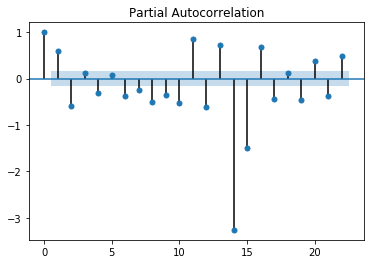

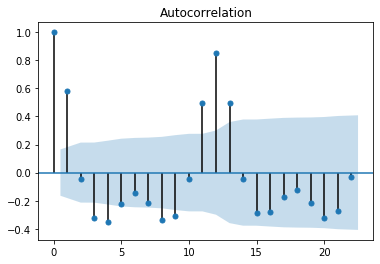

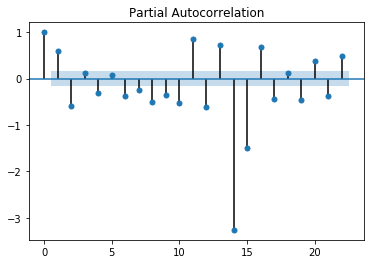

In [64]:
#Plotting the ACF and PACF for above data
plot_acf(df['2 Shifted Passengers'])
plot_pacf(df['2 Shifted Passengers'])

From above we can see that we got a stationary data. But as already seen before that our data is having seasonality of 12 data, lets check with shifting 12 months.

Month
1949-04-01   NaN
1949-05-01   NaN
1949-06-01   NaN
1949-07-01   NaN
1949-08-01   NaN
Name: 12 Shifted Passengers, dtype: float64
We have great evidence where we can reject null hypothesis and tell data is stationary


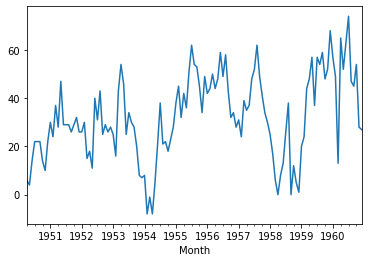

In [65]:
#Shifting 12 row and the find the difference
df['12 Shifted Passengers'] = df['#Passengers'] - df['#Passengers'].shift(12)
print(df['12 Shifted Passengers'].head())
df = df.dropna()
df['12 Shifted Passengers'].plot()
fullertest(df['12 Shifted Passengers'])

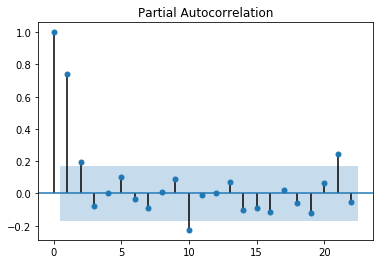

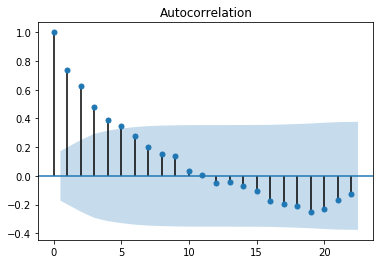

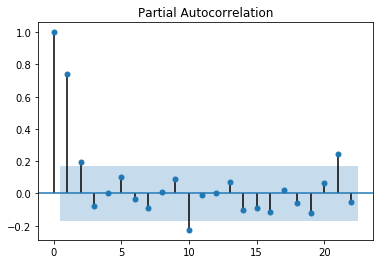

In [66]:
#Plotting the ACF and PACF for above data
plot_acf(df['12 Shifted Passengers'])
plot_pacf(df['12 Shifted Passengers'])

# ARIMAX Model

In [67]:
#Now its time to create the model.
#First create train and test data
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [68]:
#ARIMAX MODEL
model_ARIMA=ARIMA(train_data['#Passengers'],order=(0,2,0))
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

C:\Users\SarojRakesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\SarojRakesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency infor

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                   67
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -320.202
Method:                           css   S.D. of innovations             28.795
Date:                Mon, 05 Sep 2022   AIC                            644.404
Time:                        21:45:05   BIC                            648.813
Sample:                    06-01-1950   HQIC                           646.148
                         - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7612      3.518      0.216      0.829      -6.134       7.656
==============================================================================
"""

In [69]:
#For prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [70]:
#predicct the data from our created model
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)

C:\Users\SarojRakesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [71]:
#Crating a column and keeping our predicted data to evaluate easily
test_data['Pred']=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
test_data.head(10)

D:\Anaconda1\AnacondaFull\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,#Passengers,1 Shifted Passengers,2 Shifted Passengers,12 Shifted Passengers,Pred
Month,,,,,
1956-01-01,284.0,6.0,47.0,42.0,0.761194
1956-02-01,277.0,-7.0,-1.0,44.0,0.761194
1956-03-01,317.0,40.0,33.0,50.0,0.761194
1956-04-01,313.0,-4.0,36.0,44.0,0.761194
1956-05-01,318.0,5.0,1.0,48.0,0.761194
1956-06-01,374.0,56.0,61.0,59.0,0.761194
1956-07-01,413.0,39.0,95.0,49.0,0.761194
1956-08-01,405.0,-8.0,31.0,58.0,0.761194
1956-09-01,355.0,-50.0,-58.0,43.0,0.761194


In [72]:
#Let's find the residiuals to see the error in our model
residuals=test_data['#Passengers']-pred
residuals

Month
1956-01-01    283.238806
1956-02-01    276.238806
1956-03-01    316.238806
1956-04-01    312.238806
1956-05-01    317.238806
1956-06-01    373.238806
1956-07-01    412.238806
1956-08-01    404.238806
1956-09-01    354.238806
1956-10-01    305.238806
1956-11-01    270.238806
1956-12-01    305.238806
1957-01-01    314.238806
1957-02-01    300.238806
1957-03-01    355.238806
1957-04-01    347.238806
1957-05-01    354.238806
1957-06-01    421.238806
1957-07-01    464.238806
1957-08-01    466.238806
1957-09-01    403.238806
1957-10-01    346.238806
1957-11-01    304.238806
1957-12-01    335.238806
1958-01-01    339.238806
1958-02-01    317.238806
1958-03-01    361.238806
1958-04-01    347.238806
1958-05-01    362.238806
1958-06-01    434.238806
1958-07-01    490.238806
1958-08-01    504.238806
1958-09-01    403.238806
1958-10-01    358.238806
1958-11-01    309.238806
1958-12-01    336.238806
1959-01-01    359.238806
1959-02-01    341.238806
1959-03-01    405.238806
1959-04-01    395.2

From above we can see that ARIMAX model is not good enough to predict. we got a high residual prediction. This may happen because we have a seasonality dateset. Hence lets try with SARIMAX model

# SARIMAX Model

In [73]:
#SARIMAX Model
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(3,0,6),seasonal_order=(0,1,0,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\SarojRakesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SarojRakesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SarojRakesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   69
Model:             SARIMAX(3, 0, 6)x(0, 1, [], 12)   Log Likelihood                -213.841
Date:                             Mon, 05 Sep 2022   AIC                            447.683
Time:                                     21:45:06   BIC                            468.113
Sample:                                 04-01-1950   HQIC                           455.623
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3368      0.138      9.694      0.000       1.066       1.607
ar.L2         -1.3129      0.211     -6.234      0.000      -1.726      -0.900
ar.L3          0.9580      0.134      7.132      0.000       0.695       1.221
ma.L1         -0.6255      0.184     -3.404      0.001      -0.986      -0.265
ma.L2          1.1744      0.610      1.926      0.054      -0.020       2.369
ma.L3         -0.5658      0.343     -1.649      0.099      -1.238       0.107
ma.L4          0.1495      0.289      0.517      0.605      -0.418       0.716
ma.L5         -0.1936      0.279     -0.693      0.488      -0.741       0.354
ma.L6          0.0050      0.218      0.023      0.982      -0.422       0.432
sigma2        94.6229     47.012      2.013      0.044       2.481     186.765
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.90   Prob(JB):                         0.46
Heteroskedasticity (H):               1.39   Skew:                             0.38
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
#Get the date for prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


C:\Users\SarojRakesh\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


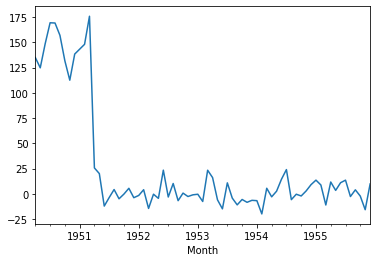

In [75]:
#Predicting the data with our model and plotting the residual graph
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['#Passengers']-pred_Sarima
model_SARIMA_fit.resid.plot()

D:\Anaconda1\AnacondaFull\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


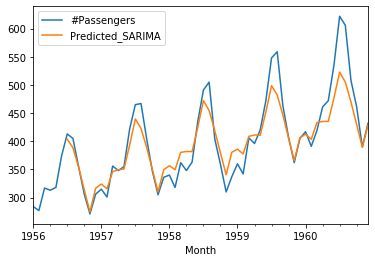

In [76]:
#Creating a column for our prdicted data in testdata dataframe and plotting the graph for a clear view
test_data['Predicted_SARIMA']=pred_Sarima
test_data[['#Passengers','Predicted_SARIMA']].plot()

From above we can clearly see a very good prediction and SARIMAX is performing very good with seasonality data

THANK YOU !!!